In [70]:
#Make sure to install xlrd 1.2:   pip install xlrd==1.2.0
import xlrd
import pandas as pd
import numpy as np
from scipy import stats
from random import randrange
import random
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import matplotlib.mlab as mlab
import matplotlib.dates as mdates
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.ticker as FuncFormatter
import datetime as dt
import math

In [2]:
file = ('/Users/alfaro/Documents/pythoncode/master/metodoscuantitativos/GoldPriceDataFall2019.xlsx')

In [3]:
df1 = pd.read_excel(file, nrows=533)
new_header = df1.iloc[11]
df1 = df1[12:]
df1.columns = new_header
df1.columns = df1.columns.fillna('to_drop')
df1.drop('to_drop', axis = 1, inplace = True)
df1['Date'] = pd.to_datetime(df1['Date'], infer_datetime_format=True)
df1.tail()

11,Date,CLOSING PRICE US dollar,Daily % Change,Daily $ Contract Change,Daily $ Change
528,2017-09-07,1343.5,0.004223,5.65,565.0
529,2017-09-06,1337.85,0.001722,2.3,230.0
530,2017-09-05,1335.55,0.001838,2.45,245.0
531,2017-09-04,1333.1,0.009618,12.7,1270.0
532,2017-09-01,1320.4,NaN,NaN,NaN


Text(0, 0.5, 'Price in USD')

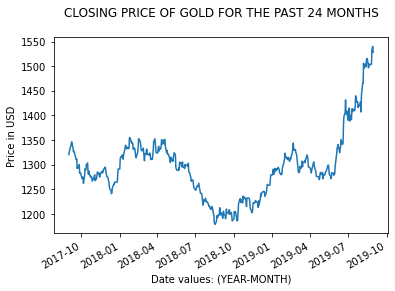

In [51]:
df1_by_date = df1.set_index(df1['Date'])
df1_by_date
df1_by_date.iloc[:,1].plot()
plt.title('CLOSING PRICE OF GOLD FOR THE PAST 24 MONTHS\n')
#plt.xticks(rotation='vertical')
plt.xlabel('Date values: (YEAR-MONTH)')
plt.ylabel('Price in USD')

In [80]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

new_df = df1_by_date.iloc[:,2].astype(float).groupby([df1_by_date.index.year, df1_by_date.index.month]).agg(['mean','std','count'])

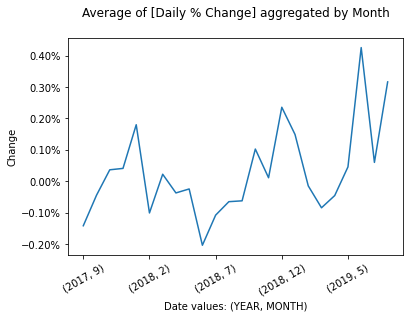

In [81]:
#df1_by_date.loc['2019-08-30':'2019-08-01'].iloc[:,2].astype(float).describe()
ax = new_df.iloc[:,0].plot()
#plt.scatter([],new_df.iloc[:,0].plot())
#plt.plot(new_df.iloc[:,0].index.to_pydatetime(), new_df.iloc[:,0])
plt.title('Average of [Daily % Change] aggregated by Month\n')
#plt.xticks(rotation='vertical')
plt.xlabel('Date values: (YEAR, MONTH)')
plt.ylabel('Change')
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#left = dt.date(new_df.index.min()[0], new_df.index.min()[1], 1)
#right = dt.date(new_df.index.max()[1], new_df.index.min()[1],1)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
#plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 
plt.gca().xaxis.set_tick_params(rotation = 30)
ax.xaxis.grid(True, which='minor')
#plt.gca().set_xbound(left, right)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
plt.show()

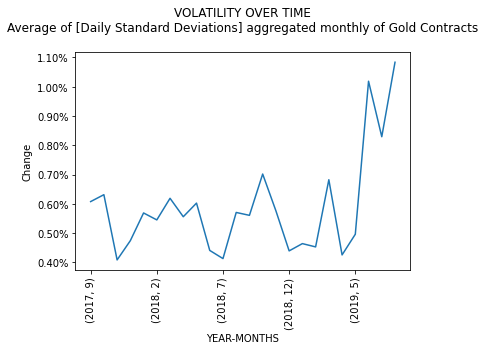

In [54]:
ax = new_df.iloc[:,1].plot()

plt.title('VOLATILITY OVER TIME\nAverage of [Daily Standard Deviations] aggregated monthly of Gold Contracts\n')
plt.xticks(rotation='vertical')
plt.xlabel('YEAR-MONTHS')
plt.ylabel('Change')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
plt.show()

In [55]:
df1_by_date.loc['2018-09-30':'2018-09-01'].iloc[:,2].astype(float).describe()

count    20.000000
mean     -0.000621
std       0.005609
min      -0.007986
25%      -0.005822
50%      -0.001061
75%       0.003583
max       0.011877
Name: Daily % Change, dtype: float64

In [56]:
df_dailychange = df1.iloc[:,2].dropna().sort_values().reset_index()
df_dailychange.iloc[:,1]

0     -0.020237
1     -0.019177
2     -0.018828
3     -0.018553
4     -0.014642
         ...   
515    0.018283
516    0.019384
517    0.024844
518    0.026376
519    0.027845
Name: Daily % Change, Length: 520, dtype: object

In [124]:
df_dailychange.iloc[int(var95_)-1:int(var95_),1]

25   -0.008528
Name: Daily % Change, dtype: object

In [138]:
obs = 520 
print ('VAR 95, 99, 99.9%')
var95_ = (1-.95) * obs 
print(var95_)
var95 = df_dailychange.iloc[int(var95_)-1:int(var95_),1]
print('Obs {} value is {} '.format(int(var95_),df_dailychange.iloc[int(var95_)-1:int(var95_),1]))
var99_ = (1-.99) * obs 
print(var99_)
var99 = df_dailychange.iloc[int(var99_)-1:int(var99_),1]
print('Obs {} value is {} '.format(int(var99_),df_dailychange.iloc[int(var99_)-1:int(var99_),1]))
var995_ = (1 - .999) * obs
print(var995_)
var995= df_dailychange.iloc[0:1,1]
print('Obs {} value is {}'.format(int(var995_),df_dailychange.iloc[0:1,1]))

VAR 95, 99, 99.9%
26.00000000000002
Obs 26 value is 25   -0.008528
Name: Daily % Change, dtype: object 
5.200000000000005
Obs 5 value is 4   -0.014642
Name: Daily % Change, dtype: object 
0.5200000000000005
Obs 0 value is 0   -0.020237
Name: Daily % Change, dtype: object


In [185]:
print ('CVAR 95, 99, 99.9%')
cvar95  = ((1/var95_)  * sum(df_dailychange.iloc[:int(var95_),1]))
print(cvar95)
cvar99  = ((1/var99_)  * sum(df_dailychange.iloc[:int(var99_),1]))
print(cvar99)
cvar995 = ((1/var995_) * df_dailychange.iloc[0:1,1][0])
print(cvar995)

CVAR 95, 99, 99.9%
-0.012476584925818946
-0.01758393933715957
-0.038917407147903635


In [207]:
df_dailychange

,index,Daily % Change
0,141,-0.020237
1,59,-0.019177
2,350,-0.018828
3,52,-0.018553
4,518,-0.014642
...,...,...
515,60,0.018283
516,15,0.019384
517,32,0.024844
518,63,0.026376


In [60]:
df_dailychange.iloc[:,1].astype(float).describe()

count    520.000000
mean       0.000300
std        0.006174
min       -0.020237
25%       -0.003158
50%        0.000000
75%        0.003384
max        0.027845
Name: Daily % Change, dtype: float64

In [215]:
z_score = stats.norm.interval(1-df_dailychange.iloc[:,1].astype(float).mean())[0]
z_score

-3.6150036285223917

In [234]:
#Stadard Deviation of the Mean or STANDARD ERROR
# SIGMA / ROOT of pop size
df_dailychange.iloc[:,1].astype(float).std()/math.sqrt(df_dailychange.iloc[:,1].count())

0.0002707409868718561

In [235]:
#Z-Score
stats.norm.interval(1-df_dailychange.iloc[:,1].astype(float).mean())

(-3.6150036285223917, 3.6150036285223917)

0.9996996565849885

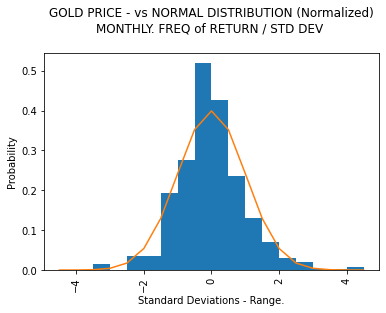

In [243]:
plt.hist(stats.zscore(df_dailychange.iloc[:,1].astype(float)), density=True, bins=np.linspace(-4.5, 4.5, num=19))
plt.title('GOLD PRICE - vs NORMAL DISTRIBUTION (Normalized)\nMONTHLY. FREQ of RETURN / STD DEV \n')
plt.xticks(rotation='vertical')
plt.xlabel('Standard Deviations - Range.')
plt.ylabel('Probability')
#plt.set_major_locator(plt.MultipleLocator(0.5))
plt.plot(np.linspace(-4.5, 4.5, num=19), stats.norm.pdf(np.linspace(-4.5, 4.5, num=19),0,1))

In [72]:
mu=df_dailychange.iloc[:,1].mean()
sigma=df_dailychange.iloc[:,1].std()
standard_error_for_mean = mu / math.sqrt(obs)
standard_error_for_mean

1.3170930034096173e-05

In [77]:
0.0003/math.sqrt(obs)

1.3155870289605437e-05

In [78]:
z95=1.96
z99=2.57
z995=2.807

In [82]:
new_df

mean       std  count
Date Date                           
2017 9    -0.001414  0.006078     20
     10   -0.000442  0.006314     22
     11    0.000366  0.004087     22
     12    0.000411  0.004744     21
2018 1     0.001800  0.005690     23
     2    -0.001007  0.005453     20
     3     0.000225  0.006191     22
     4    -0.000370  0.005562     21
     5    -0.000243  0.006027     23
     6    -0.002035  0.004411     21
     7    -0.001076  0.004132     22
     8    -0.000648  0.005708     23
     9    -0.000621  0.005609     20
     10    0.001027  0.007020     23
     11    0.000113  0.005763     22
     12    0.002357  0.004395     21
2019 1     0.001490  0.004643     23
     2    -0.000145  0.004531     20
     3    -0.000842  0.006825     21
     4    -0.000453  0.004257     22
     5     0.000459  0.004964     23
     6     0.004255  0.010189     20
     7     0.000602  0.008294     23
     8     0.003163  0.010837     22

In [83]:
ci95_lo = []
ci99_lo = []
ci995_lo = []

for i in new_df.index:
    m, s, c = new_df.loc[i]
    ci95_lo.append(m - z95*s/math.sqrt(c))
    ci99_lo.append(m - z99*s/math.sqrt(c))
    ci995_lo.append(m - z995*s/math.sqrt(c))

In [84]:
new_df['ci95_lo'] = ci95_lo
new_df['ci99_lo'] = ci99_lo
new_df['ci995_lo'] = ci995_lo

In [91]:
new_df

mean       std  count   ci95_lo   ci99_lo  ci995_lo
Date Date                                                         
2017 9    -0.001414  0.006078     20 -0.004078 -0.004907 -0.005229
     10   -0.000442  0.006314     22 -0.003081 -0.003902 -0.004221
     11    0.000366  0.004087     22 -0.001341 -0.001873 -0.002079
     12    0.000411  0.004744     21 -0.001618 -0.002250 -0.002495
2018 1     0.001800  0.005690     23 -0.000525 -0.001249 -0.001530
     2    -0.001007  0.005453     20 -0.003397 -0.004141 -0.004430
     3     0.000225  0.006191     22 -0.002362 -0.003167 -0.003480
     4    -0.000370  0.005562     21 -0.002749 -0.003489 -0.003776
     5    -0.000243  0.006027     23 -0.002706 -0.003473 -0.003771
     6    -0.002035  0.004411     21 -0.003921 -0.004508 -0.004737
     7    -0.001076  0.004132     22 -0.002803 -0.003340 -0.003549
     8    -0.000648  0.005708     23 -0.002981 -0.003707 -0.003989
     9    -0.000621  0.005609     20 -0.003079 -0.003844 -0.004142
     10    0.001027  0.007020     23 -0.001842 -0.002735 -0.003082
     11    0.000113  0.005763     22 -0.002295 -0.003045 -0.003336
     12    0.002357  0.004395     21  0.000477 -0.000108 -0.000336
2019 1     0.001490  0.004643     23 -0.000407 -0.000998 -0.001228
     2    -0.000145  0.004531     20 -0.002131 -0.002749 -0.002989
     3    -0.000842  0.006825     21 -0.003762 -0.004670 -0.005023
     4    -0.000453  0.004257     22 -0.002232 -0.002786 -0.003001
     5     0.000459  0.004964     23 -0.001570 -0.002201 -0.002446
     6     0.004255  0.010189     20 -0.000210 -0.001600 -0.002140
     7     0.000602  0.008294     23 -0.002788 -0.003843 -0.004253
     8     0.003163  0.010837     22 -0.001365 -0.002775 -0.003322

<AxesSubplot:xlabel='Date,Date'>

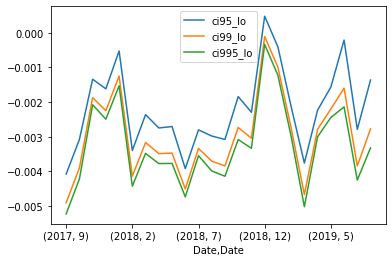

In [92]:
new_df.iloc[:,3:6].plot()

In [187]:
cvar95

-0.012476584925818946

In [188]:
#Value at risk over 42-trading-days period
#Trading days between 9SEP19 and 29OCT19
trading_days = 42
price_per_ounce = 1520

price_per_ounce_var95 = price_per_ounce
price_per_ounce_var99 = price_per_ounce
price_per_ounce_var995 = price_per_ounce
price_per_ounce_cvar95 = price_per_ounce
price_per_ounce_cvar99 = price_per_ounce
price_per_ounce_cvar995 = price_per_ounce

_var = var995.reset_index(drop=True)[0]

_var95 = var95.reset_index(drop=True)[0]
_var99 = var99.reset_index(drop=True)[0]
_var995 = var995.reset_index(drop=True)[0]

acum_loses_var95 = 0
acum_loses_var99 = 0
acum_loses_var995 = 0

acum_loses_cvar95 = 0
acum_loses_cvar99 = 0
acum_loses_cvar995 = 0

acum_loses = 0

risk = [[0,1520,0,0,1520,0,0,1520,0,0,1520,0,0,1520,0,0,1520,0,0]]

for x in range (42):
    max_loss_var95 = _var95*price_per_ounce_var95
    max_loss_var99 = _var99*price_per_ounce_var99
    max_loss_var995 = _var995*price_per_ounce_var995
    max_loss_cvar95 = cvar95*price_per_ounce_cvar95
    max_loss_cvar99 = cvar99*price_per_ounce_cvar99
    max_loss_cvar995 = cvar995*price_per_ounce_cvar995
    
    price_per_ounce_var95 += max_loss_var95
    price_per_ounce_var99 += max_loss_var99
    price_per_ounce_var995 += max_loss_var995
    price_per_ounce_cvar95 += max_loss_cvar95
    price_per_ounce_cvar99 += max_loss_cvar99
    price_per_ounce_cvar995 += max_loss_cvar995
            
    #price_per_ounce = price_per_ounce+price_per_ounce*cvar95
    acum_loses_var95+=max_loss_var95
    acum_loses_var99+=max_loss_var99
    acum_loses_var995+=max_loss_var995
    acum_loses_cvar95+=max_loss_cvar95
    acum_loses_cvar99+=max_loss_cvar99
    acum_loses_cvar995+=max_loss_cvar995
    
    risk.append([x+1,price_per_ounce_var95,max_loss_var95,acum_loses_var95,
               price_per_ounce_var99,max_loss_var99,acum_loses_var99,
               price_per_ounce_var995,max_loss_var995,acum_loses_var995,
               price_per_ounce_cvar95,max_loss_cvar95,acum_loses_cvar95,
               price_per_ounce_cvar99,max_loss_cvar99,acum_loses_cvar99,
               price_per_ounce_cvar995,max_loss_cvar995,acum_loses_cvar995])
    
    #print ('var95 scenario: Day {}. Price per ounce: {}.  Max Loss for the day = {}. Acummulated Losses: {} '
    #       .format(x+1, round(price_per_ounce,2), round(max_loss,2), round(acum_loses,2)))
print(risk)

[[0, 1520, 0, 0, 1520, 0, 0, 1520, 0, 0, 1520, 0, 0, 1520, 0, 0, 1520, 0, 0], [1, 1507.0377019748653, -12.962298025134707, -12.962298025134707, 1497.744223289865, -22.255776710135034, -22.255776710135034, 1489.239681390297, -30.760318609703063, -30.760318609703063, 1501.0355909127552, -18.9644090872448, -18.9644090872448, 1493.2724122075174, -26.72758779248255, -26.72758779248255, 1460.8455411351865, -59.15445886481353, -59.15445886481353], [2, 1494.1859441932124, -12.851757781652857, -25.814055806787565, 1475.8143147356323, -21.929908554232806, -44.18568526436784, 1459.1018609391272, -30.137820451169873, -60.898139060872936, 1482.3077928860553, -18.727798026699816, -37.69220711394462, 1467.0148006974064, -26.257611510110927, -52.98519930259347, 1403.9932204306288, -56.85232070455766, -116.00677956937119], [3, 1481.4437839868967, -12.742160206315601, -38.55621601310317, 1454.2055029893315, -21.608811746300777, -65.79449701066862, 1429.5739411190625, -29.527919820064607, -90.42605888093

In [191]:
max_risk = pd.DataFrame(risk, columns = ['Trading Day', 'Gold Price var95', 'Loss var95', 'Acum Losses var95'
                                        , 'Gold Price var99', 'Loss var99', 'Acum Losses var99'
                                        , 'Gold Price var995', 'Loss var995', 'Acum Losses var995'
                                        , 'Gold Price cvar95', 'Loss cvar95', 'Acum Losses cvar95'
                                        , 'Gold Price cvar99', 'Loss cvar99', 'Acum Losses cvar99'
                                        , 'Gold Price cvar995', 'Loss cvar995', 'Acum Losses cvar995']).set_index('Trading Day')

In [192]:
max_risk

,Gold Price var95,Loss var95,Acum Losses var95,Gold Price var99,Loss var99,Acum Losses var99,Gold Price var995,Loss var995,Acum Losses var995,Gold Price cvar95,Loss cvar95,Acum Losses cvar95,Gold Price cvar99,Loss cvar99,Acum Losses cvar99,Gold Price cvar995,Loss cvar995,Acum Losses cvar995
Trading Day,,,,,,,,,,,,,,,,,,
0,1520.000000,0.000000,0.000000,1520.000000,0.000000,0.000000,1520.000000,0.000000,0.000000,1520.000000,0.000000,0.000000,1520.000000,0.000000,0.000000,1520.000000,0.000000,0.000000
1,1507.037702,-12.962298,-12.962298,1497.744223,-22.255777,-22.255777,1489.239681,-30.760319,-30.760319,1501.035591,-18.964409,-18.964409,1493.272412,-26.727588,-26.727588,1460.845541,-59.154459,-59.154459
2,1494.185944,-12.851758,-25.814056,1475.814315,-21.929909,-44.185685,1459.101861,-30.137820,-60.898139,1482.307793,-18.727798,-37.692207,1467.014801,-26.257612,-52.985199,1403.993220,-56.852321,-116.006780
3,1481.443784,-12.742160,-38.556216,1454.205503,-21.608812,-65.794497,1429.573941,-29.527920,-90.426059,1463.813654,-18.494139,-56.186346,1441.218901,-25.795899,-78.781099,1349.353445,-54.639776,-170.646555
4,1468.810287,-12.633497,-51.189713,1432.913087,-21.292416,-87.086913,1400.643579,-28.930362,-119.356421,1445.550258,-18.263395,-74.449742,1415.876596,-25.342306,-104.123404,1296.840107,-52.513337,-223.159893
5,1456.284526,-12.525761,-63.715474,1411.932433,-20.980654,-108.067567,1372.298683,-28.344897,-147.701317,1427.514728,-18.035531,-92.485272,1390.979908,-24.896688,-129.020092,1246.370453,-50.469654,-273.629547
6,1443.865582,-12.418943,-76.134418,1391.258977,-20.673456,-128.741023,1344.527403,-27.771279,-175.472597,1409.704219,-17.810509,-110.295781,1366.521001,-24.458906,-153.478999,1197.864946,-48.505506,-322.135054
7,1431.552545,-12.313037,-88.447455,1370.888221,-20.370756,-149.111779,1317.318133,-27.209271,-202.681867,1392.115925,-17.588294,-127.884075,1342.492179,-24.028822,-177.507821,1151.247149,-46.617798,-368.752851
8,1419.344512,-12.208033,-100.655488,1350.815733,-20.072488,-169.184267,1290.659498,-26.658635,-229.340502,1374.747072,-17.368853,-145.252928,1318.885878,-23.606301,-201.114122,1106.443595,-44.803554,-413.556405


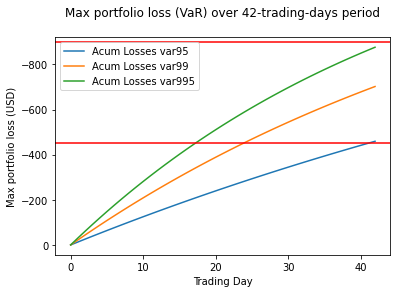

In [208]:
# Build plot
ax = max_risk.plot( y=["Acum Losses var95", "Acum Losses var99", "Acum Losses var995"])
plt.title("Max portfolio loss (VaR) over 42-trading-days period\n")
plt.ylabel("Max portfolio loss (USD)")
plt.gca().invert_yaxis()
plt.axhline(y=-450, color='r', linestyle='-')
plt.axhline(y=-900, color='r', linestyle='-')
plt.show()


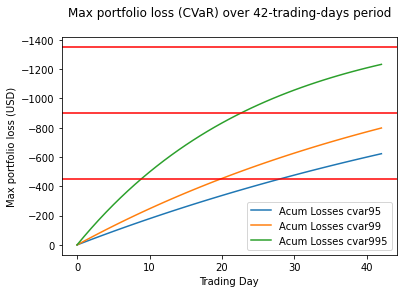

In [210]:
# Build plot CVAR
ax = max_risk.plot( y=["Acum Losses cvar95", "Acum Losses cvar99", "Acum Losses cvar995"])
plt.title("Max portfolio loss (CVaR) over 42-trading-days period\n")
plt.ylabel("Max portfolio loss (USD)")
plt.gca().invert_yaxis()
plt.axhline(y=-450, color='r', linestyle='-')
plt.axhline(y=-900, color='r', linestyle='-')
plt.axhline(y=-1350, color='r', linestyle='-')
plt.show()

In [244]:
# Z SCORE
stats.norm.ppf(.975,df_dailychange.iloc[:,1].astype(float).mean(),df_dailychange.iloc[:,1].astype(float).std())

0.01240085607726242

In [230]:
stats.norm.ppf(.975)

1.959963984540054

In [249]:
stats.norm.interval(.90,df_dailychange.iloc[:,1].astype(float).mean(),df_dailychange.iloc[:,1].astype(float).std())

(-0.009854726931929753, 0.010455413761952817)

In [246]:
stats.norm.interval(.98,df_dailychange.iloc[:,1].astype(float).mean(),df_dailychange.iloc[:,1].astype(float).std())

(-0.014062166370206589, 0.014662853200229652)

In [247]:
stats.norm.interval(.99,df_dailychange.iloc[:,1].astype(float).mean(),df_dailychange.iloc[:,1].astype(float).std())

(-0.0156024258956729, 0.016203112725695967)